# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [3]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_unimodal import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results_leonardo/100D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-16 10:30:00.681097: Importing os...
2024-04-16 10:30:00.681244: Importing sys...
Visible devices: [3]
2024-04-16 10:30:00.681480: Importing timer from timeit...
2024-04-16 10:30:00.681548: Setting env variables for tf import (only device(s) [3] will be available)...
2024-04-16 10:30:00.681680: Importing numpy...
2024-04-16 10:30:00.758415: Importing matplotlib...
2024-04-16 10:30:01.099633: Importing h5py...
2024-04-16 10:30:01.123582: Importing importlib.util...
2024-04-16 10:30:01.123693: Importing json...
2024-04-16 10:30:01.123757: Importing pandas...
2024-04-16 10:30:12.933947: Importing random...
2024-04-16 10:30:12.934094: Importing scipy utils...
2024-04-16 10:30:13.354420: Importing subprocess...
2024-04-16 10:30:13.354612: Importing tensorflow...


# Model definition

In [ ]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = 0.,
                                                             eps_scale = 0.,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
dist_2 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = eps_loc,
                                                             eps_scale = eps_scale,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float32'> <dtype: 'float32'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float32'> <dtype: 'float32'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
batch_size_test = 100_000

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 1000,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 1000,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 100_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000           100000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...      100           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims    nsamples  small_sample  \
0       True      100           0  float64   100  1000000000         False   

   ncomp  
0     10  

[1 rows x 21 columns]

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 20,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results_leonardo/100D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results_leonardo/100D_100K/null_hypothesis/FN.json
Loading fpd from ../results_leonardo/100D_100K/null_hypothesis/FPD.json
Loading kpd from ../results_leonardo/100D_100K/null_hypothesis/KPD.json
Loading ks from ../results_leonardo/100D_100K/null_hypothesis/KS.json


Loading sks from ../results_leonardo/100D_100K/null_hypothesis/SKS.json
Loading swd from ../results_leonardo/100D_100K/null_hypothesis/SWD.json


In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9216766037143461], [0.95, [9500, 500], 1.16046660730621], [0.99, [9900, 100], 1.308470387362808]]
Computing time for metric fn: 151.04789586621337
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.7980934739484278], [0.95, [9500, 500], 1.1885730935139536], [0.99, [9900, 100], 1.4114961108844881]]
Computing time for metric fpd: 2162.1952606718987
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.010146803347765854], [0.95, [9500, 500], -0.008704731096331741], [0.99, [9900, 100], -0.007736727242813047]]
Computing time for metric kpd: 31845.051321998937
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9113114360175587], [0.95, [9500, 500], 1.089458032331301], [0.99, [9900, 100], 1.2258810796679505]]
Computing time for metric ks: 1337.2733181351796
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.906523021635548], [0.95, [9500, 500], 1.0731505575089073], [0.99, [9900, 100], 1.1863828824868625]]
Computing time for metric sks: 6989.7410

name object_name          class_name                                kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                    {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                    {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                    {}   
3   ks      KSTest     GMetrics.KSTest                                    {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 1000, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 1000, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                   {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f747809cc20>   
1          metric_list  <function <lambda> at 0x7f747809c040>   
2          metric_list  <function <lambda> at 0x7f747809e200>   
3      statistic_means  <function <lambda> at 0x7f747809e2a0>   
4         metric_means  <function <lambda> at 0x7f747809e340>   
5         metric_means  <function <lambda> at 0x7f747809e3e0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f747809e480>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...            500   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/100D_100K/null_hypothesis/...   
1  ../results_leonardo/100D_100K/null_hypothesis/...   
2  ../results_leonardo/100D_100K/null_hypothesis/...   
3  ../results_leonardo/100D_100K/null_hypothesis/...   
4  ../results_leonardo/100D_100K/null_hypothesis/...   
5  ../results_leonardo/100D_100K/null_hypothesis/...   
6  ../results_leonardo/100D_100K/null_hypothesis/...   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.9216766037143461], [0....  
1  [[0.68, [6800, 3199], 0.7980934739484278], [0....  
2  [[0.68, [6800, 3199], -0.010146803347765854], ...  
3  [[0.68, [6800, 3199], 0.9113114360175587], [0....  
4  [[0.68, [6800, 3199], 0.906523021635548], [0.9...  
5  [[0.68, [6800, 3199], 0.3217538093809494], [0....  
6                                                 []

### Plots of null-distributions

mu = 0.8442492329305263 +/- 0.0003258750902870547
sigma = 0.1805201069928374 +/- 0.0013077703865225503


/tmp/ipykernel_347018/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_347018/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_347018/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_347018/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


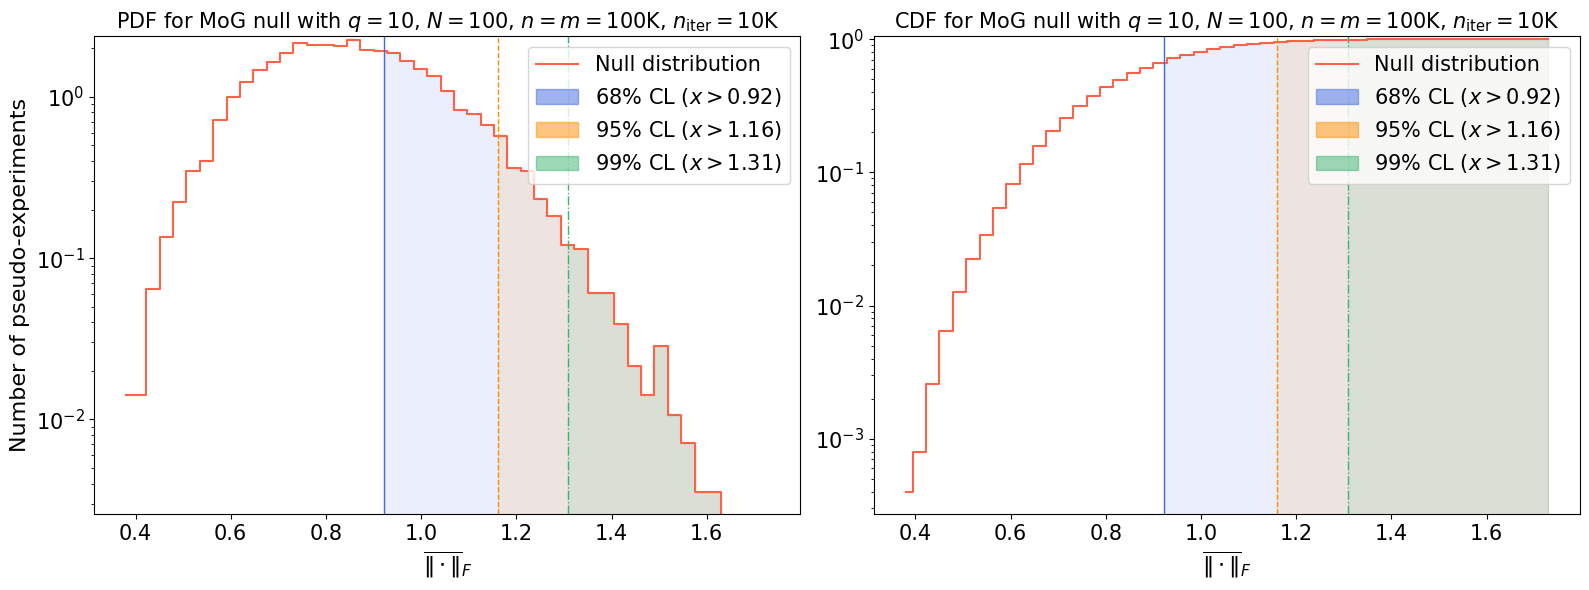

Time elapsed: 1.4314448009245098 seconds.
mu = 0.7143853273456311 +/- 0.0006292036533567613
sigma = 0.25083932174935436 +/- 0.0019416120232126045


/tmp/ipykernel_347018/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_347018/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_347018/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_347018/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


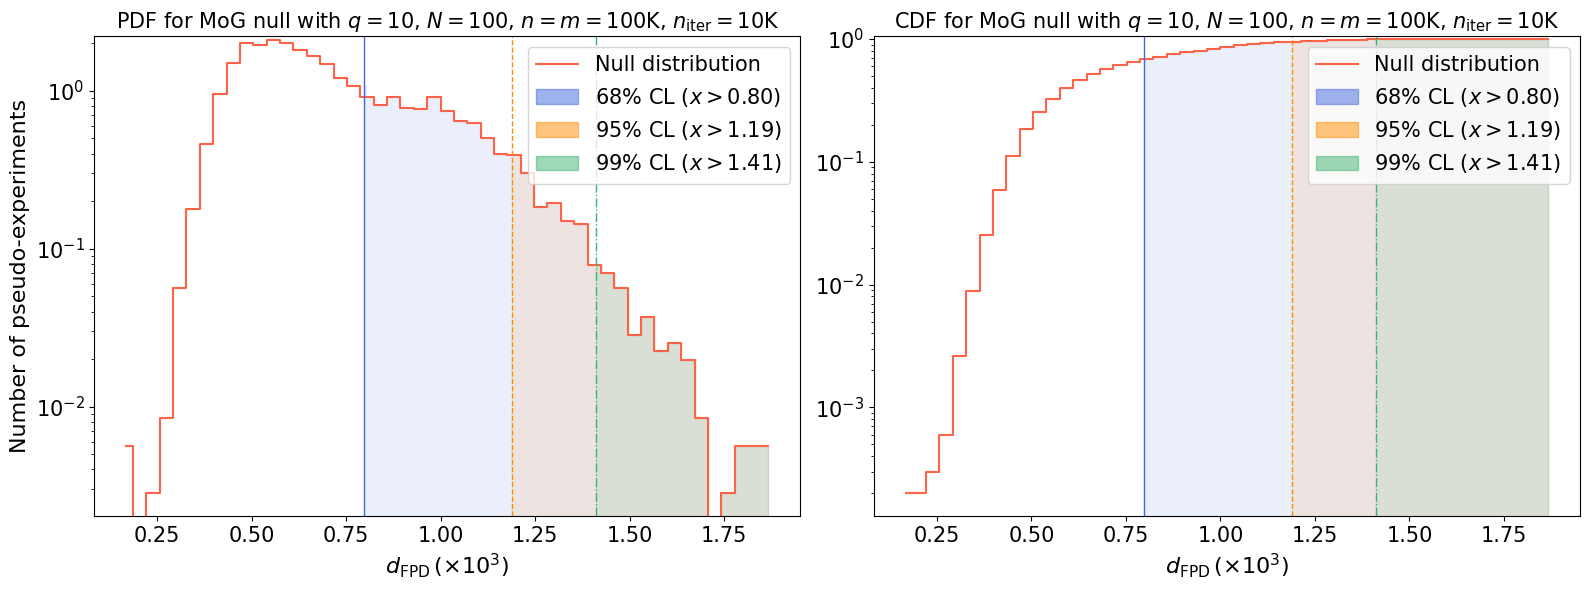

Time elapsed: 0.9563991471659392 seconds.
mu = -0.010658749726870918 +/- 1.3155947437403854e-08
sigma = 0.001146993785397456 +/- 8.522719592556045e-06


/tmp/ipykernel_347018/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_347018/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_347018/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_347018/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


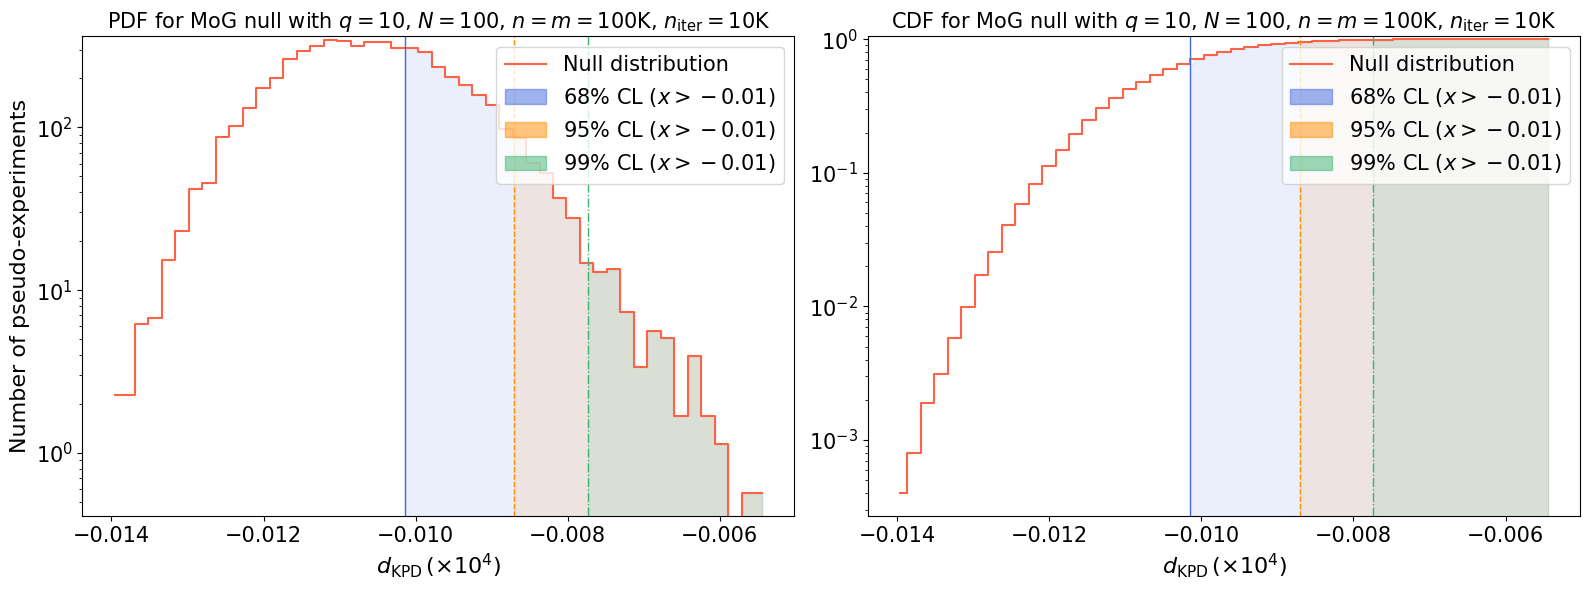

Time elapsed: 0.9624770879745483 seconds.
mu = 0.8671553536069728 +/- 0.00014783620205781583
sigma = 0.12158791142947387 +/- 0.0010181407564804317


/tmp/ipykernel_347018/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_347018/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_347018/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_347018/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


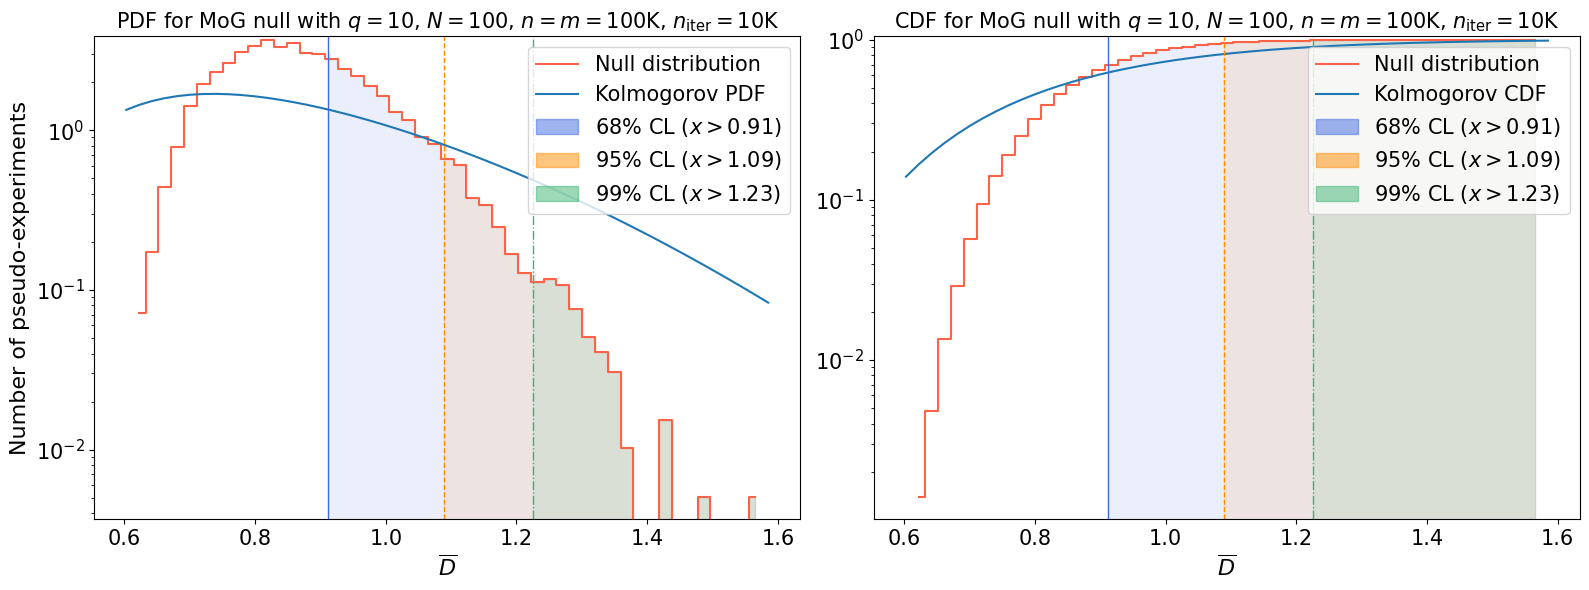

Time elapsed: 1.2126150869298726 seconds.
mu = 0.8667111344444797 +/- 0.000127170747754699
sigma = 0.11277000831546435 +/- 0.0009840315047732727


/tmp/ipykernel_347018/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_347018/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_347018/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_347018/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


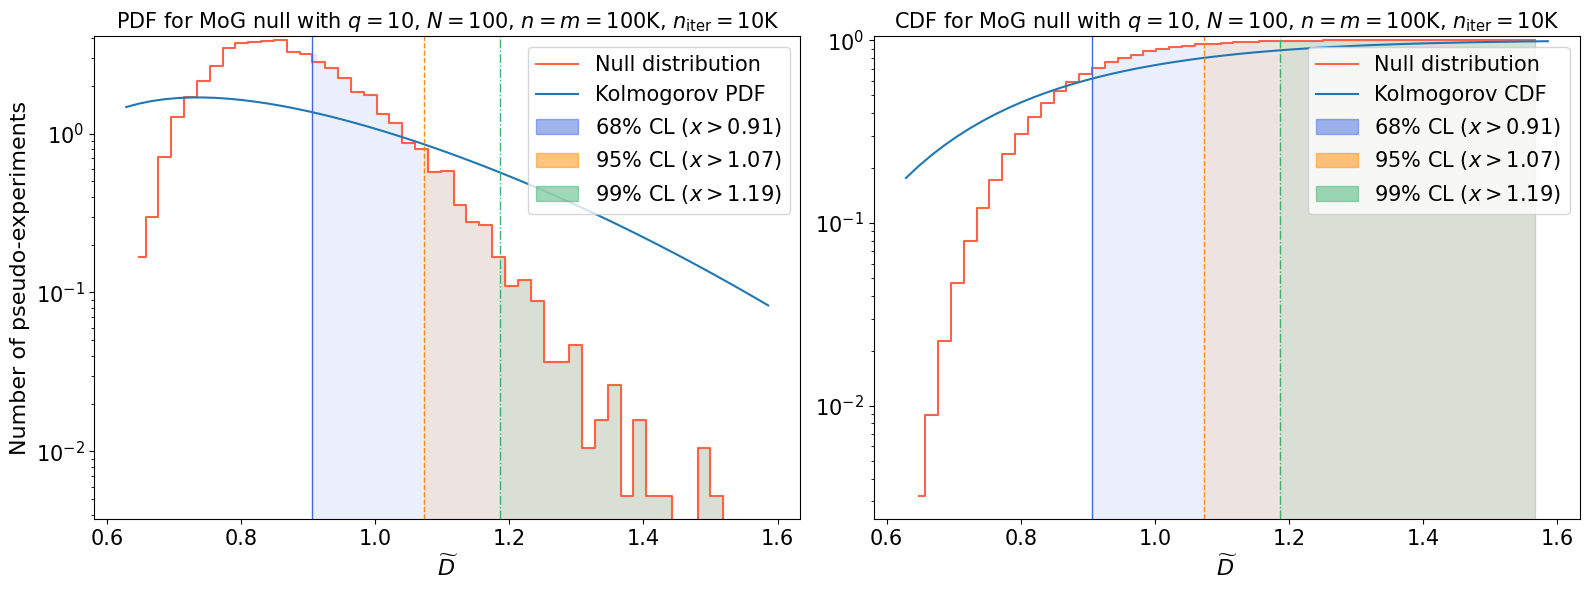

Time elapsed: 1.2290076150093228 seconds.
mu = 0.29866277428909943 +/- 3.651229967323727e-05
sigma = 0.060425408292569496 +/- 0.0004943193004214308


/tmp/ipykernel_347018/1904285626.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_347018/1904285626.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_347018/1904285626.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_347018/1904285626.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


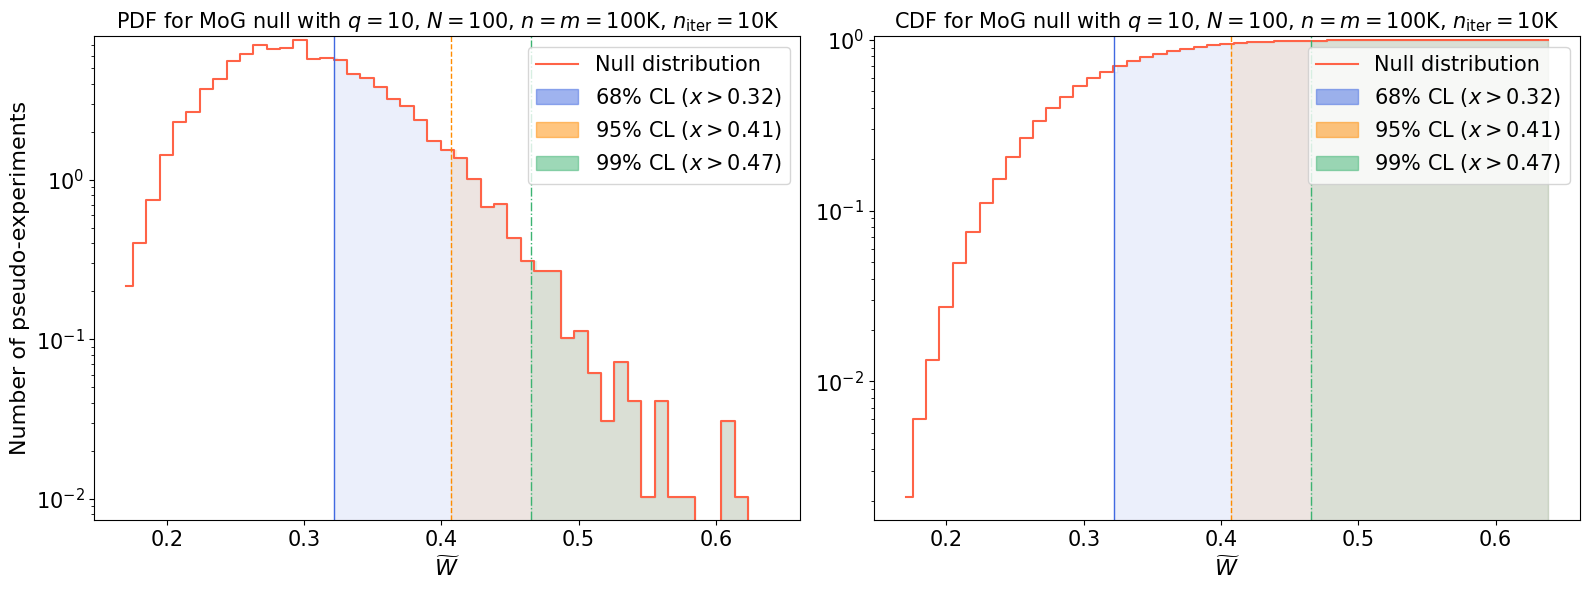

Time elapsed: 0.8768499970901757 seconds.


name object_name          class_name                                kwargs  \
0   fn    FNMetric   GMetrics.FNMetric                                    {}   
1  fpd   FPDMetric  GMetrics.FPDMetric                                    {}   
2  kpd   KPDMetric  GMetrics.KPDMetric                                    {}   
3   ks      KSTest     GMetrics.KSTest                                    {}   
4  sks     SKSTest    GMetrics.SKSTest  {'nslices': 1000, 'seed_slicing': 0}   
5  swd   SWDMetric  GMetrics.SWDMetric  {'nslices': 1000, 'seed_slicing': 0}   
6   lr    LRMetric   GMetrics.LRMetric                   {'null_test': True}   

            result_key                             scale_func  \
0          metric_list  <function <lambda> at 0x7f747809cc20>   
1          metric_list  <function <lambda> at 0x7f747809c040>   
2          metric_list  <function <lambda> at 0x7f747809e200>   
3      statistic_means  <function <lambda> at 0x7f747809e2a0>   
4         metric_means  <function <lambda> at 0x7f747809e340>   
5         metric_means  <function <lambda> at 0x7f747809e3e0>   
6  lik_ratio_norm_list  <function <lambda> at 0x7f747809e480>   

                     scale_func_string  \
0  lambda ns, ndims: np.sqrt(ns)/ndims   
1               lambda ns, ndims: 1000   
2              lambda ns, ndims: 10000   
3            lambda ns, _: np.sqrt(ns)   
4            lambda ns, _: np.sqrt(ns)   
5  lambda ns, ndims: np.sqrt(ns/ndims)   
6        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 100000, 'b...             20   
1  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   
2  {'niter': 10000, 'batch_size_test': 100000, 'b...              1   
3  {'niter': 10000, 'batch_size_test': 100000, 'b...            500   
4  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   
5  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   
6  {'niter': 10000, 'batch_size_test': 100000, 'b...             10   

                        latex  \
0  $\overline{\|\cdot\|}_{F}$   
1          $d_{\mathrm{FPD}}$   
2          $d_{\mathrm{KPD}}$   
3              $\overline{D}$   
4             $\widetilde{D}$   
5             $\widetilde{W}$   
6                   $t_{\mu}$   

                                           null_file  \
0  ../results_leonardo/100D_100K/null_hypothesis/...   
1  ../results_leonardo/100D_100K/null_hypothesis/...   
2  ../results_leonardo/100D_100K/null_hypothesis/...   
3  ../results_leonardo/100D_100K/null_hypothesis/...   
4  ../results_leonardo/100D_100K/null_hypothesis/...   
5  ../results_leonardo/100D_100K/null_hypothesis/...   
6  ../results_leonardo/100D_100K/null_hypothesis/...   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.9216766037143461], [0....   
1  [[0.68, [6800, 3199], 0.7980934739484278], [0....   
2  [[0.68, [6800, 3199], -0.010146803347765854], ...   
3  [[0.68, [6800, 3199], 0.9113114360175587], [0....   
4  [[0.68, [6800, 3199], 0.906523021635548], [0.9...   
5  [[0.68, [6800, 3199], 0.3217538093809494], [0....   
6                                                 []   

                                         null_figure  
0  ../results_leonardo/100D_100K/null_hypothesis/...  
1  ../results_leonardo/100D_100K/null_hypothesis/...  
2  ../results_leonardo/100D_100K/null_hypothesis/...  
3  ../results_leonardo/100D_100K/null_hypothesis/...  
4  ../results_leonardo/100D_100K/null_hypothesis/...  
5  ../results_leonardo/100D_100K/null_hypothesis/...  
6                                                NaN

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.005,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712928997.131820  347018 service.cc:145] XLA service 0xc15a4fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712928997.131868  347018 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1712928997.348174  347018 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712928997.353088  347018 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712928997.358456  347018 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712928997.363840  347018 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712928997.367172  347018 assert_op.cc:38] Ignoring Assert operator while/M

Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712929363.786786  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 10.913827904965729 seconds.
statistic = 1695659.698389901 - next threshold = -1656783.1107142668 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 172.46589834865026

------------ 2 ------------
eps = 0.00125
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712929375.083375  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712929732.840468  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 10.855597369140014 seconds.
statistic = 424190.83333569724 - next threshold = -414045.4241453185 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 165.24444539426682

------------ 3 ------------
eps = 0.000625
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712929744.128244  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712930102.170369  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.386760028079152 seconds.
statistic = 106185.66270310325 - next threshold = -103352.80026179623 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 147.93408949869306

------------ 4 ------------
eps = 0.0003125
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712930113.960059  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712930471.920371  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 10.970979053061455 seconds.
statistic = 26615.392860328026 - next threshold = -25709.319702528774 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 115.49776552248285

------------ 5 ------------
eps = 0.00015625
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712930483.281116  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712930842.011929  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.459493325091898 seconds.
statistic = 6688.336807377471 - next threshold = -6340.937632965113 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 75.01039380638841

------------ 6 ------------
eps = 7.8125e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712930853.971899  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712931211.998801  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 10.890052127884701 seconds.
statistic = 1689.3284979833425 - next threshold = -1533.8508096197993 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 41.46163146015646

------------ 7 ------------
eps = 3.90625e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712931223.296048  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712931582.273401  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.078181532910094 seconds.
statistic = 430.95427256542143 - next threshold = -355.6811767480837 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 20.9008395568691

------------ 8 ------------
eps = 1.953125e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712931594.478155  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712931952.402282  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.020545257953927 seconds.
statistic = 112.04964217302025 - next threshold = -75.0217714649032 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 10.104357072680102

------------ 9 ------------
eps = 9.765625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712931963.792471  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712932322.074132  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.038791622966528 seconds.
statistic = 30.167947561919245 - next threshold = -11.809233751618688 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 4.572998059372298

------------ 10 ------------
eps = 4.8828125e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712932333.563488  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712932693.251851  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.06845410913229 seconds.
statistic = 8.619755399383848 - next threshold = 0.5489391575711453 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.7605158927866162

------------ 11 ------------
eps = 2.44140625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712932704.668242  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712933062.623804  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.029620619025081 seconds.
statistic = 2.6938231034418716 - next threshold = 1.8875892315609457 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 0.35195865943833676

------------ 12 ------------
eps = 1.220703125e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712933074.054180  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712933432.612366  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 10.86760456697084 seconds.
statistic = 0.9428979031194044 - next threshold = 1.345177820034016 at 0.95 CL
relative_error_eps = 0.6666666666666667
relative_error_metric = 0.3516316464913063

------------ 13 ------------
eps = 1.8310546875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712933443.916671  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712933802.320992  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.185663447948173 seconds.
statistic = 1.717357090998546 - next threshold = 1.7160457945400729 at 0.95 CL
relative_error_eps = 0.3999999999999999
relative_error_metric = 0.000763846540699493

------------ 14 ------------
eps = 1.52587890625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712933813.808799  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712934171.451832  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.041212811134756 seconds.
statistic = 1.3048766444494335 - next threshold = 1.5565817549379 at 0.95 CL
relative_error_eps = 0.18181818181818174
relative_error_metric = 0.17592784891952926

------------ 15 ------------
eps = 1.678466796875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712934182.917646  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712934541.151822  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.05491378204897 seconds.
statistic = 1.5048041539789145 - next threshold = 1.6426396426471912 at 0.95 CL
relative_error_eps = 0.0869565217391304
relative_error_metric = 0.08758567115068365

------------ 16 ------------
eps = 1.7547607421874999e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712934552.628813  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712934910.004037  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.310796988895163 seconds.
statistic = 1.6095024453366233 - next threshold = 1.680916232987205 at 0.95 CL
relative_error_eps = 0.04255319148936174
relative_error_metric = 0.04340711297381796

------------ 17 ------------
eps = 1.79290771484375e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712934922.942332  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712935280.294636  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.032071333145723 seconds.
statistic = 1.6630352230893046 - next threshold = 1.6988679350038591 at 0.95 CL
relative_error_eps = 0.02105263157894739
relative_error_metric = 0.02131692094002996

------------ 18 ------------
eps = 1.811981201171875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712935291.695291  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712935649.919277  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.071193844079971 seconds.
statistic = 1.6900975203792286 - next threshold = 1.7075471406872984 at 0.95 CL
relative_error_eps = 0.010471204188481685
relative_error_metric = 0.01027159815034476

------------ 19 ------------
eps = 1.8215179443359374e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712935661.430916  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712936020.198062  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.048370945965871 seconds.
statistic = 1.7037026466214953 - next threshold = 1.711812578246529 at 0.95 CL
relative_error_eps = 0.005221932114882511
relative_error_metric = 0.004748877455434018
=======> statistic within required accuracy at 0.95 CL in 7028.877918577986 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 ------------
eps = 1.8262863159179688e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712936031.689066  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712936391.675311  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.663671369897202 seconds.
statistic = 1.7105237041748815 - next threshold = 2.750093835040812 at 0.99 CL
relative_error_eps = 1.99853950440389
relative_error_metric = 0.46611040813363136

------------ 2 ------------
eps = 0.002500913143157959
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712936403.234213  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712936761.270866  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.05260607181117 seconds.
statistic = 1696898.2253960876 - next threshold = -1644701.9362124011 at 0.99 CL
relative_error_eps = 1.9970811402986497
relative_error_metric = 128.03975967904162

------------ 3 ------------
eps = 0.0012513697147369385
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712936772.734161  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712937131.590344  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.19717371207662 seconds.
statistic = 425120.3700368594 - next threshold = -411479.3379940237 at 0.99 CL
relative_error_eps = 1.9941707879234098
relative_error_metric = 122.65929812403978

------------ 4 ------------
eps = 0.0006265980005264282
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712937143.161690  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712937501.459974  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.057460388168693 seconds.
statistic = 106728.64079952182 - next threshold = -102979.64053260129 at 0.99 CL
relative_error_eps = 1.988375456810592
relative_error_metric = 111.87424187855815

------------ 5 ------------
eps = 0.00031421214342117307
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712937512.941381  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712937871.172344  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.15996489697136 seconds.
statistic = 26907.075791387073 - next threshold = -25722.35246423965 at 0.99 CL
relative_error_eps = 1.9768852627519096
relative_error_metric = 88.8467831258931

------------ 6 ------------
eps = 0.00015801921486854553
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712937884.643813  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712938242.176012  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.187132033053786 seconds.
statistic = 6839.868189990425 - next threshold = -6374.180904457758 at 0.99 CL
relative_error_eps = 1.9542987121342776
relative_error_metric = 56.7507402712683

------------ 7 ------------
eps = 7.992275059223175e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712938253.834691  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712938611.120159  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.03955845697783 seconds.
statistic = 1767.158114975853 - next threshold = -1557.728885733574 at 0.99 CL
relative_error_eps = 1.9106393721570114
relative_error_metric = 31.751890724508364

------------ 8 ------------
eps = 4.087451845407486e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712938622.578950  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712938980.878033  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.144099781988189 seconds.
statistic = 471.0265088633608 - next threshold = -368.25114618480296 at 0.99 CL
relative_error_eps = 1.8289225389774053
relative_error_metric = 16.332273283687734

------------ 9 ------------
eps = 2.1350402384996414e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712938992.498797  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712939351.339205  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.208812517113984 seconds.
statistic = 133.01656366694232 - next threshold = -80.24837470323826 at 0.99 CL
relative_error_eps = 1.6848063432209077
relative_error_metric = 8.083087275057789

------------ 10 ------------
eps = 1.1588344350457191e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712939362.932172  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712939721.207757  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.090285497019067 seconds.
statistic = 41.52555553026565 - next threshold = -13.14543915561253 at 0.99 CL
relative_error_eps = 1.4554344845301779
relative_error_metric = 3.852767477352982

------------ 11 ------------
eps = 6.7073153331875794e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712939732.717656  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712940092.201956  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.435439205961302 seconds.
statistic = 15.15854257869337 - next threshold = 1.222882543492926 at 0.99 CL
relative_error_eps = 1.143955206247814
relative_error_metric = 1.7013977637789994

------------ 12 ------------
eps = 4.266800824552774e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712940103.883937  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712940462.052306  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.203195047099143 seconds.
statistic = 6.8196588822963085 - next threshold = 3.631243925079027 at 0.99 CL
relative_error_eps = 0.8010765158517836
relative_error_metric = 0.6101702438505459

------------ 13 ------------
eps = 3.0465435702353712e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712940473.635933  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712940832.347066  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.101147901965305 seconds.
statistic = 3.8613727272328338 - next threshold = 3.590177036877664 at 0.99 CL
relative_error_eps = 0.5008413110356642
relative_error_metric = 0.07278907044581553

------------ 14 ------------
eps = 2.43641494307667e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712940843.987919  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712941202.559244  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.154278466943651 seconds.
statistic = 2.6850185751580566 - next threshold = 3.2700124745051298 at 0.99 CL
relative_error_eps = 0.2225545298865107
relative_error_metric = 0.19647047831267314

------------ 15 ------------
eps = 2.7414792566560203e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712941214.168808  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712941572.195919  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.233848521020263 seconds.
statistic = 3.2479632416516853 - next threshold = 3.4550640133522363 at 0.99 CL
relative_error_eps = 0.105412270373921
relative_error_metric = 0.0617932059118354

------------ 16 ------------
eps = 2.8940114134456956e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712941583.888484  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712941941.675207  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.216010792879388 seconds.
statistic = 3.548359881825829 - next threshold = 3.5288628395301602 at 0.99 CL
relative_error_eps = 0.054132697831943064
relative_error_metric = 0.00550980040145833

------------ 17 ------------
eps = 2.817745335050858e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712941955.833826  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712942313.720540  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.498529833974317 seconds.
statistic = 3.3965845361175764 - next threshold = 3.493524005703545 at 0.99 CL
relative_error_eps = 0.026704946219886675
relative_error_metric = 0.02813873511500492

------------ 18 ------------
eps = 2.855878374248277e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712942325.508345  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712942683.445355  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.378661744995043 seconds.
statistic = 3.4720779532578794 - next threshold = 3.5115835694080726 at 0.99 CL
relative_error_eps = 0.013263920042096
relative_error_metric = 0.011313725907813552

------------ 19 ------------
eps = 2.8749448938469863e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712942695.238448  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712943053.615535  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.238059202209115 seconds.
statistic = 3.510120353580471 - next threshold = 3.5203207428132828 at 0.99 CL
relative_error_eps = 0.006610041256373128
relative_error_metric = 0.002901777880777419
=======> statistic within required accuracy at 0.99 CL in 7033.395357389934 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 14062.27330855187 seconds.
Saving results in the file ../results_leonardo/100D_100K/exclusion_limits.json
Computing exclusion limits for lr with std deformation.

=============== lr - only std ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to F

I0000 00:00:1712943065.384187  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712943423.144356  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.314259005943313 seconds.
statistic = 138220.94660288398 - next threshold = -43789.828575175 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 3.8548897647203844

------------ 2 ------------
eps = 0.00125
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712943434.868322  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712943793.697511  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.287793441209942 seconds.
statistic = 19816.160424298447 - next threshold = -35554.04785723398 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -7.03654903080018

------------ 3 ------------
eps = 0.000625
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712943805.415675  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712944163.565770  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.195967209991068 seconds.
statistic = 3616.9155650816083 - next threshold = -6155.843007236723 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -7.6983362423488035

------------ 4 ------------
eps = 0.0003125
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712944175.175682  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712944533.169148  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.29163626395166 seconds.
statistic = 11895.206455554317 - next threshold = -102136.54174634945 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -2.527261987745328

------------ 5 ------------
eps = 0.00015625
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712944547.779841  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712944905.664069  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.365759994834661 seconds.
statistic = 2037.7761822187397 - next threshold = -3678.348967853017 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -6.968450531576741

------------ 6 ------------
eps = 7.8125e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712944917.358749  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712945275.853071  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.43337716604583 seconds.
statistic = 462.37490992466866 - next threshold = -533.1920736202611 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -28.116544961455222

------------ 7 ------------
eps = 3.90625e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712945287.679926  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712945645.467588  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.243910644901916 seconds.
statistic = 111.07064459273553 - next threshold = -93.25619967538151 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 22.939456740419804

------------ 8 ------------
eps = 1.953125e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712945657.086160  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712946014.714608  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.326167289866135 seconds.
statistic = 27.207794241670896 - next threshold = -13.525876195385527 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 5.954380124081446

------------ 9 ------------
eps = 9.765625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712946026.453838  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712946384.984817  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.315637822961435 seconds.
statistic = 6.7058542224674005 - next threshold = 0.5513499520376124 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.6961088932983104

------------ 10 ------------
eps = 4.8828125e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712946396.716186  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712946755.034429  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.260997866047546 seconds.
statistic = 1.6498688671402963 - next threshold = 1.9880246763369358 at 0.95 CL
relative_error_eps = 0.6666666666666667
relative_error_metric = 0.1859074792350398

------------ 11 ------------
eps = 7.32421875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712946766.799054  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712947124.857613  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.299542994005606 seconds.
statistic = 3.7494790842773327 - next threshold = 1.7180521320431614 at 0.95 CL
relative_error_eps = 0.3999999999999999
relative_error_metric = 0.7430874637424635

------------ 12 ------------
eps = 6.103515625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712947136.575365  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712947495.331973  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.360490799881518 seconds.
statistic = 2.592909466581286 - next threshold = 1.9576634142954163 at 0.95 CL
relative_error_eps = 0.22222222222222227
relative_error_metric = 0.27919388126071937

------------ 13 ------------
eps = 5.4931640625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712947510.742791  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712947869.053132  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.660530882887542 seconds.
statistic = 2.0947390851105125 - next threshold = 1.999520769274779 at 0.95 CL
relative_error_eps = 0.11764705882352937
relative_error_metric = 0.04651307890667804

------------ 14 ------------
eps = 5.1879882812499995e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712947880.926853  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712948239.751945  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.35301257390529 seconds.
statistic = 1.865646566223707 - next threshold = 1.999400247727284 at 0.95 CL
relative_error_eps = 0.0571428571428572
relative_error_metric = 0.06921193348592292

------------ 15 ------------
eps = 5.340576171875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712948251.557529  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712948609.251023  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.347427676199004 seconds.
statistic = 1.9785278346998576 - next threshold = 2.0009297384204983 at 0.95 CL
relative_error_eps = 0.028169014084507067
relative_error_metric = 0.011258772487967486

------------ 16 ------------
eps = 5.4168701171875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712948621.026883  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712948978.733613  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.392773829167709 seconds.
statistic = 2.0362171335990125 - next threshold = 2.000672969282658 at 0.95 CL
relative_error_eps = 0.014184397163120581
relative_error_metric = 0.01760967646405925

------------ 17 ------------
eps = 5.37872314453125e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712948990.565585  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712949349.174590  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.395184194901958 seconds.
statistic = 2.007268412121787 - next threshold = 2.0009051747103506 at 0.95 CL
relative_error_eps = 0.007117437722419936
relative_error_metric = 0.0031751306541919593
=======> statistic within required accuracy at 0.95 CL in 6295.551296015037 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 ------------
eps = 5.359649658203124e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712949360.961952  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712949719.531787  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.334985227091238 seconds.
statistic = 1.9928721073466165 - next threshold = 3.5157057208532567 at 0.99 CL
relative_error_eps = 1.9957168714870916
relative_error_metric = 0.5528953791705912

------------ 2 ------------
eps = 0.0025026798248291016
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712949731.333641  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712950089.671283  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.33542831405066 seconds.
statistic = 138561.18751278892 - next threshold = -43024.693400356846 at 0.99 CL
relative_error_eps = 1.9914520489605951
relative_error_metric = 3.801393019497796

------------ 3 ------------
eps = 0.0012540197372436523
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712950101.428673  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712950460.327759  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.369372965069488 seconds.
statistic = 20069.80231060188 - next threshold = -35613.39783822259 at 0.99 CL
relative_error_eps = 1.9829768544286308
relative_error_metric = -7.164777293628923

------------ 4 ------------
eps = 0.0006296896934509277
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712950472.204131  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712950831.015445  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.545066651888192 seconds.
statistic = 3516.7939511246796 - next threshold = -5747.432412416676 at 0.99 CL
relative_error_eps = 1.9662410506121437
relative_error_metric = -8.306345043629769

------------ 5 ------------
eps = 0.0003175246715545654
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712950843.014207  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712951205.104935  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.945131042972207 seconds.
statistic = 12560.427396277353 - next threshold = -117245.56608714422 at 0.99 CL
relative_error_eps = 1.9336028502335196
relative_error_metric = -2.4799316332136905

------------ 6 ------------
eps = 0.00016144216060638426
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712951217.367515  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712951575.983746  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.73440626799129 seconds.
statistic = 2192.109392792165 - next threshold = -3979.8699070689377 at 0.99 CL
relative_error_eps = 1.8714726261135548
relative_error_metric = -6.904704797508003

------------ 7 ------------
eps = 8.34009051322937e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712951588.074932  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712951947.766302  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.552123965928331 seconds.
statistic = 529.9464662291272 - next threshold = -596.7698711245824 at 0.99 CL
relative_error_eps = 1.7584670501055966
relative_error_metric = -33.72220673629095

------------ 8 ------------
eps = 4.438027739524841e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712951959.692094  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712952318.417621  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.5203381490428 seconds.
statistic = 144.1308755536431 - next threshold = -114.0088910919608 at 0.99 CL
relative_error_eps = 1.5689861263814453
relative_error_metric = 17.139625509997817

------------ 9 ------------
eps = 2.4869963526725767e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712952330.382501  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712952689.122533  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.448723145062104 seconds.
statistic = 44.37666431028339 - next threshold = -20.42523275465025 at 0.99 CL
relative_error_eps = 1.290808039730366
relative_error_metric = 5.411108468770659

------------ 10 ------------
eps = 1.5114806592464445e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712952700.975254  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712953059.138990  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.48416040907614 seconds.
statistic = 16.204762992297205 - next threshold = -0.7737530527303276 at 0.99 CL
relative_error_eps = 0.9529099884099
relative_error_metric = 2.200570942734302

------------ 11 ------------
eps = 1.0237228125333785e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712953071.047265  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712953428.620180  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.457616379950196 seconds.
statistic = 7.376117886110541 - next threshold = 3.1554385322213716 at 0.99 CL
relative_error_eps = 0.6254557527249626
relative_error_metric = 0.8015300277065183

------------ 12 ------------
eps = 7.798438891768454e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712953440.574058  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712953798.748077  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.52736917603761 seconds.
statistic = 4.256514859876362 - next threshold = 3.7692443633414854 at 0.99 CL
relative_error_eps = 0.37069050330575526
relative_error_metric = 0.1214266421362964

------------ 13 ------------
eps = 6.579044274985789e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712953810.745365  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712954168.863813  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.628968524048105 seconds.
statistic = 3.018029710061714 - next threshold = 3.7544362814856034 at 0.99 CL
relative_error_eps = 0.16962560173290003
relative_error_metric = 0.21747073291855426

------------ 14 ------------
eps = 7.188741583377122e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712954180.931457  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712954540.203913  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.54271373595111 seconds.
statistic = 3.610565178137597 - next threshold = 3.7877438400457017 at 0.99 CL
relative_error_eps = 0.08136250969986532
relative_error_metric = 0.04789706985005397

------------ 15 ------------
eps = 7.493590237572788e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712954552.152782  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712954911.952315  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.656170821050182 seconds.
statistic = 3.9268580754247644 - next threshold = 3.785040994260835 at 0.99 CL
relative_error_eps = 0.041525918078037696
relative_error_metric = 0.036778770023428504

------------ 16 ------------
eps = 7.3411659104749554e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712954928.739827  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712955287.337371  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.069620484020561 seconds.
statistic = 3.767041786950716 - next threshold = 3.7878092835647266 at 0.99 CL
relative_error_eps = 0.02054962354307275
relative_error_metric = 0.005497791133186074

------------ 17 ------------
eps = 7.417378074023872e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712955299.691035  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712955658.682719  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.643853270914406 seconds.
statistic = 3.8465323914474574 - next threshold = 3.7868519653160067 at 0.99 CL
relative_error_eps = 0.010327870232858168
relative_error_metric = 0.015636688352675874

------------ 18 ------------
eps = 7.379271992249414e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712955670.673303  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712956030.404958  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.652066192124039 seconds.
statistic = 3.8066827142409654 - next threshold = 3.7874372796747013 at 0.99 CL
relative_error_eps = 0.005177302744153543
relative_error_metric = 0.0050685094735619905
=======> statistic within required accuracy at 0.99 CL in 6681.3226902538445 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 12976.874018813949 seconds.
Saving results in the file ../results_leonardo/100D_100K/exclusion_limits.json
Computing exclusion limits for lr with both deformation.

=============== lr - mean+std ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute

I0000 00:00:1712956042.561730  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712956401.608475  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.70975300995633 seconds.
statistic = 1826268.8312909883 - next threshold = -193031.60990868427 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 2.472758292259125

------------ 2 ------------
eps = 0.00125
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712956413.740591  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712956772.578417  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.552271454129368 seconds.
statistic = 442104.04033454636 - next threshold = -146139.33077103808 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 3.9750913003995083

------------ 3 ------------
eps = 0.000625
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712956784.559826  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712957142.882820  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.61713530914858 seconds.
statistic = 109326.83991182272 - next threshold = -291226.76429091097 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -4.404109628632507

------------ 4 ------------
eps = 0.0003125
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712957154.901412  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712957512.862359  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.65537840500474 seconds.
statistic = 38391.664726792194 - next threshold = -740341.1463086038 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -2.2187716679569496

------------ 5 ------------
eps = 0.00015625
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712957524.955421  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712957882.868282  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.603242443175986 seconds.
statistic = 8696.379342324468 - next threshold = -21337.001370379432 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -4.751883356063798

------------ 6 ------------
eps = 7.8125e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712957894.892670  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712958252.865447  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.55051621189341 seconds.
statistic = 2144.269996089943 - next threshold = -2979.5471674236996 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -12.268543519109992

------------ 7 ------------
eps = 3.90625e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712958264.844835  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712958623.880995  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.666612323140725 seconds.
statistic = 540.166564202323 - next threshold = -557.5041770106235 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = -126.623053975162

------------ 8 ------------
eps = 1.953125e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712958635.966110  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712958995.715799  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.739807362901047 seconds.
statistic = 138.7928481756009 - next threshold = -108.78961115567992 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 16.503716526779804

------------ 9 ------------
eps = 9.765625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712959007.910694  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712959367.518573  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.695793417049572 seconds.
statistic = 36.75765472467994 - next threshold = -17.64062451501819 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 5.691080533231069

------------ 10 ------------
eps = 4.8828125e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712959379.641188  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712959743.416761  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.316740431124344 seconds.
statistic = 10.240587501070632 - next threshold = -0.30968192991980636 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 2.124734618691544

------------ 11 ------------
eps = 2.44140625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712959756.104910  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712960114.664365  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.089140551863238 seconds.
statistic = 3.0883271191012196 - next threshold = 1.8939034089870448 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 0.4794734821604042

------------ 12 ------------
eps = 1.220703125e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712960127.037200  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712960486.037226  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.896322554908693 seconds.
statistic = 1.036490761731789 - next threshold = 1.4529818062377002 at 0.95 CL
relative_error_eps = 0.6666666666666667
relative_error_metric = 0.33460183483412925

------------ 13 ------------
eps = 1.8310546875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712960498.370437  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712960857.891323  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.753040987998247 seconds.
statistic = 1.9354511171290076 - next threshold = 1.8026886831408735 at 0.95 CL
relative_error_eps = 0.3999999999999999
relative_error_metric = 0.07103128351622866

------------ 14 ------------
eps = 1.52587890625e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712960870.123239  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712961229.261711  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.782751504098997 seconds.
statistic = 1.4542364510097474 - next threshold = 1.6595269444439489 at 0.95 CL
relative_error_eps = 0.18181818181818174
relative_error_metric = 0.13186004674211238

------------ 15 ------------
eps = 1.678466796875e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712961241.486278  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712961600.582938  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.737811204977334 seconds.
statistic = 1.6869095411872341 - next threshold = 1.7390367212786597 at 0.95 CL
relative_error_eps = 0.0869565217391304
relative_error_metric = 0.030430821792228575

------------ 16 ------------
eps = 1.7547607421874999e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712961612.776168  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712961971.184472  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.813553486019373 seconds.
statistic = 1.8091966912890958 - next threshold = 1.7728471444250535 at 0.95 CL
relative_error_eps = 0.04444444444444436
relative_error_metric = 0.020295422686693758

------------ 17 ------------
eps = 1.7166137695312498e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712961983.416199  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712962341.099071  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.671869680052623 seconds.
statistic = 1.7475572169454212 - next threshold = 1.756437766816985 at 0.95 CL
relative_error_eps = 0.021978021978022
relative_error_metric = 0.005068814260703288

------------ 18 ------------
eps = 1.7356872558593748e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712962353.295109  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712962711.513110  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.791374366963282 seconds.
statistic = 1.778252977713566 - next threshold = 1.764766450332249 at 0.95 CL
relative_error_eps = 0.011049723756906089
relative_error_metric = 0.007613013507383202

------------ 19 ------------
eps = 1.7261505126953123e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712962723.718610  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712963081.821714  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.730602001072839 seconds.
statistic = 1.7628741024053902 - next threshold = 1.76063310363043 at 0.95 CL
relative_error_eps = 0.005540166204986156
relative_error_metric = 0.0012720273545185027
=======> statistic within required accuracy at 0.95 CL in 7051.37610197207 seconds

New threshold. Resetting eps_min and eps_max.

------------ 1 ------------
eps = 1.721382141113281e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712963093.955864  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712963453.055572  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.024669260019436 seconds.
statistic = 1.7552079122943962 - next threshold = 2.9318715357703162 at 0.99 CL
relative_error_eps = 1.9986233682289782
relative_error_metric = 0.5020881922373911

------------ 2 ------------
eps = 0.0025008606910705564
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712963465.267564  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712963825.095102  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.865600547054783 seconds.
statistic = 1827540.1612413998 - next threshold = -191050.61838938243 at 0.99 CL
relative_error_eps = 1.9972486302694497
relative_error_metric = 2.4669766922101464

------------ 3 ------------
eps = 0.0012512910366058348
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712963837.406073  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712964196.751934  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.75817569391802 seconds.
statistic = 443057.4864024155 - next threshold = -144947.18970841903 at 0.99 CL
relative_error_eps = 1.9945048201746163
relative_error_metric = 3.944880016770492

------------ 4 ------------
eps = 0.000626506209373474
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712964209.001676  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712964569.445829  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.862661133054644 seconds.
statistic = 109803.51546435642 - next threshold = -286372.81438208604 at 0.99 CL
relative_error_eps = 1.9890397546089107
relative_error_metric = -4.487488281086012

------------ 5 ------------
eps = 0.00031411379575729364
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712964581.778186  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712964941.897337  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 18.08245952310972 seconds.
statistic = 38873.88439070347 - next threshold = -771633.5017173347 at 0.99 CL
relative_error_eps = 1.9781989814742296
relative_error_metric = -2.212205386167591

------------ 6 ------------
eps = 0.00015791758894920347
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712964960.810553  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712965319.925525  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.284894799115136 seconds.
statistic = 8887.314349625443 - next threshold = -21770.443363180675 at 0.99 CL
relative_error_eps = 1.956868122379982
relative_error_metric = -4.7593651636258505

------------ 7 ------------
eps = 7.981948554515838e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712965332.573576  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712965691.657278  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.082225179998204 seconds.
statistic = 2238.410046087253 - next threshold = -3060.393498287964 at 0.99 CL
relative_error_eps = 1.915557330209617
relative_error_metric = -12.892725590007034

------------ 8 ------------
eps = 4.077043384313583e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712965704.005390  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712966063.789820  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.854689691215754 seconds.
statistic = 587.8536392345275 - next threshold = -582.1143923097613 at 0.99 CL
relative_error_eps = 1.837956359243261
relative_error_metric = 407.7078567557767

------------ 9 ------------
eps = 2.1245907992124557e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712966076.065426  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712966435.095478  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.891500710044056 seconds.
statistic = 163.4717757479181 - next threshold = -117.30671610584507 at 0.99 CL
relative_error_eps = 1.700202830873438
relative_error_metric = 12.164112600771892

------------ 10 ------------
eps = 1.1483645066618919e-05
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712966447.380005  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712966806.789090  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.987449298147112 seconds.
statistic = 49.9665193789717 - next threshold = -19.964306218743836 at 0.99 CL
relative_error_eps = 1.4785676351790245
relative_error_metric = 4.661711136058366

------------ 11 ------------
eps = 6.6025136038661e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712966819.130707  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712967177.696194  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.827228334033862 seconds.
statistic = 17.720840742576243 - next threshold = 0.1833917590742551 at 0.99 CL
relative_error_eps = 1.1727997592225752
relative_error_metric = 1.9590282891919888

------------ 12 ------------
eps = 4.161947872489691e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712967189.920068  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712967548.222791  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.908347405027598 seconds.
statistic = 7.705643924452613 - next threshold = 3.6359991037495987 at 0.99 CL
relative_error_eps = 0.8296545411301172
relative_error_metric = 0.7176464310476722

------------ 13 ------------
eps = 2.941665006801486e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712967560.503875  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712967918.922364  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.937555414857343 seconds.
statistic = 4.222653588137748 - next threshold = 3.7974129671993624 at 0.99 CL
relative_error_eps = 0.5233843137245112
relative_error_metric = 0.10604416260246632

------------ 14 ------------
eps = 2.3315235739573834e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712967931.214366  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712968289.750599  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.00347887701355 seconds.
statistic = 2.8620276847727046 - next threshold = 3.4918633092367384 at 0.99 CL
relative_error_eps = 0.23141271111388792
relative_error_metric = 0.19825194516489297

------------ 15 ------------
eps = 2.636594290379435e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712968302.195070  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712968661.541585  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.01012309989892 seconds.
statistic = 3.510609881586809 - next threshold = 3.6765861158363506 at 0.99 CL
relative_error_eps = 0.10937846384309324
relative_error_metric = 0.04618664478025908

------------ 16 ------------
eps = 2.7891296485904604e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712968674.003491  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712969034.001855  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.995570440078154 seconds.
statistic = 3.858698422240107 - next threshold = 3.745004446357415 at 0.99 CL
relative_error_eps = 0.056226730267439747
relative_error_metric = 0.029904897086980076

------------ 17 ------------
eps = 2.712861969484948e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712969046.469986  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712969406.512099  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.062509902985767 seconds.
statistic = 3.68267090166373 - next threshold = 3.7127942652919943 at 0.99 CL
relative_error_eps = 0.02772366241160902
relative_error_metric = 0.008146441893300004

------------ 18 ------------
eps = 2.750995809037704e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712969418.978116  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712969779.558101  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 11.98146819183603 seconds.
statistic = 3.770188840499135 - next threshold = 3.7293993860354386 at 0.99 CL
relative_error_eps = 0.013958576924404097
relative_error_metric = 0.010877785081420205

------------ 19 ------------
eps = 2.731928889261326e-06
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 1000
Iterating from 0 to 10 out of 10000 .


I0000 00:00:1712969791.949926  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



Iterating from 10 to 20 out of 10000 .
Iterating from 20 to 30 out of 10000 .
Iterating from 30 to 40 out of 10000 .
Iterating from 40 to 50 out of 10000 .
Iterating from 50 to 60 out of 10000 .
Iterating from 60 to 70 out of 10000 .
Iterating from 70 to 80 out of 10000 .
Iterating from 80 to 90 out of 10000 .
Iterating from 90 to 100 out of 10000 .
Iterating from 100 to 110 out of 10000 .
Iterating from 110 to 120 out of 10000 .
Iterating from 120 to 130 out of 10000 .
Iterating from 130 to 140 out of 10000 .
Iterating from 140 to 150 out of 10000 .
Iterating from 150 to 160 out of 10000 .
Iterating from 160 to 170 out of 10000 .
Iterating from 170 to 180 out of 10000 .
Iterating from 180 to 190 out of 10000 .
Iterating from 190 to 200 out of 10000 .
Iterating from 200 to 210 out of 10000 .
Iterating from 210 to 220 out of 10000 .
Iterating from 220 to 230 out of 10000 .
Iterating from 230 to 240 out of 10000 .
Iterating from 240 to 250 out of 10000 .
Iterating from 250 to 260 out of 

I0000 00:00:1712970152.423138  347018 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_cosine_multiply_fusion_1', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_4', 8 bytes spill stores, 8 bytes spill loads



LR metric calculation completed in 12.00126844109036 seconds.
statistic = 3.7263059185170513 - next threshold = 3.7212217963379075 at 0.99 CL
relative_error_eps = 0.007003728984649526
relative_error_metric = 0.0013653180958300855
=======> statistic within required accuracy at 0.99 CL in 7070.698666457087 seconds

New threshold. Resetting eps_min and eps_max.
Time elapsed: 14122.07480265689 seconds.
Saving results in the file ../results_leonardo/100D_100K/exclusion_limits.json
dict_keys(['2024-04-12T10:36:42.394963', '2024-04-12T10:41:53.900899', '2024-04-12T10:45:37.795268', '2024-04-12T10:50:23.234726', '2024-04-12T10:56:45.756386', '2024-04-12T11:02:19.950618', '2024-04-12T11:08:53.492879', '2024-04-12T11:18:09.173430', '2024-04-12T11:22:19.746751', '2024-04-12T11:31:36.765332', '2024-04-12T11:39:14.999254', '2024-04-12T11:46:28.408639', '2024-04-12T11:54:44.091190', '2024-04-12T12:04:45.383120', '2024-04-12T12:12:38.220976', '2024-04-12T14:01:37.701626', '2024-04-12T14:07:31.149620'

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr        mean  100  10000               100000   
9         ks        mean  100  10000               100000   
12       sks        mean  100  10000               100000   
15       swd        mean  100  10000               100000   
0         fn        mean  100  10000               100000   
3        fpd        mean  100  10000               100000   
6        kpd        mean  100  10000               100000   

    $\epsilon^{\mu}_{95\%\mathrm{CL}}$  $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
18                             0.00000                             0.00000   
9                              0.00107                             0.00192   
12                             0.02342                             0.02927   
15                             0.03525                             0.04479   
0                              0.03769                             0.04602   
3                              0.04288                             0.05150   
6                              1.58691                             1.66024   

    $t^{\mu}$ (s)  
18          14062  
9             458  
12            601  
15            353  
0             311  
3             382  
6             555

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
18        lr                             0.00000   
9         ks                             0.00107   
12       sks                             0.02342   
15       swd                             0.03525   
0         fn                             0.03769   
3        fpd                             0.04288   
6        kpd                             1.58691   

    $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
18                             0.00000          14062  
9                              0.00192            458  
12                             0.02927            601  
15                             0.04479            353  
0                              0.04602            311  
3                              0.05150            382  
6                              1.66024            555

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
19        lr         std  100  10000               100000   
10        ks         std  100  10000               100000   
4        fpd         std  100  10000               100000   
13       sks         std  100  10000               100000   
16       swd         std  100  10000               100000   
1         fn         std  100  10000               100000   
7        kpd         std  100  10000               100000   

    $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19                                0.00001   
10                                0.00467   
4                                 0.16052   
13                                0.21912   
16                                0.29663   
1                                 0.41382   
7                                 4.98047   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00001             12976  
10                                0.00622               433  
4                                 0.19065               334  
13                                0.26931               472  
16                                0.35060               286  
1                                 0.47428               223  
7                                 4.99023               250

Statistic  $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
19        lr                                0.00001   
10        ks                                0.00467   
4        fpd                                0.16052   
13       sks                                0.21912   
16       swd                                0.29663   
1         fn                                0.41382   
7        kpd                                4.98047   

    $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  
19                                0.00001             12976  
10                                0.00622               433  
4                                 0.19065               334  
13                                0.26931               472  
16                                0.35060               286  
1                                 0.47428               223  
7                                 4.99023               250

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
20        lr        both  100  10000               100000   
11        ks        both  100  10000               100000   
14       sks        both  100  10000               100000   
17       swd        both  100  10000               100000   
2         fn        both  100  10000               100000   
5        fpd        both  100  10000               100000   
8        kpd        both  100  10000               100000   

    $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20                                    0.00000   
11                                    0.00087   
14                                    0.02357   
17                                    0.03525   
2                                     0.03769   
5                                     0.04105   
8                                     1.58691   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00000                 14122  
11                                    0.00147                   495  
14                                    0.02927                   622  
17                                    0.04479                   362  
2                                     0.04572                   285  
5                                     0.04937                   393  
8                                     1.66024                   557

Statistic  $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
20        lr                                    0.00000   
11        ks                                    0.00087   
14       sks                                    0.02357   
17       swd                                    0.03525   
2         fn                                    0.03769   
5        fpd                                    0.04105   
8        kpd                                    1.58691   

    $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  
20                                    0.00000                 14122  
11                                    0.00147                   495  
14                                    0.02927                   622  
17                                    0.04479                   362  
2                                     0.04572                   285  
5                                     0.04937                   393  
8                                     1.66024                   557

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

Statistic  $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
0  $\overline{\|\cdot\|}_{F}$                             0.03769   
1          $d_{\mathrm{FPD}}$                             0.04288   
2          $d_{\mathrm{KPD}}$                             1.58691   
3              $\overline{D}$                             0.00107   
4          $t_{\mathrm{LLR}}$                             0.00000   
5             $\widetilde{D}$                             0.02342   
6             $\widetilde{W}$                             0.03525   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  \
0                             0.04602            311   
1                             0.05150            382   
2                             1.66024            555   
3                             0.00192            458   
4                             0.00000          14062   
5                             0.02927            601   
6                             0.04479            353   

   $\epsilon^{\sigma}_{95\%\mathrm{CL}}$  \
0                                0.41382   
1                                0.16052   
2                                4.98047   
3                                0.00467   
4                                0.00001   
5                                0.21912   
6                                0.29663   

   $\epsilon^{\sigma}_{99\%\mathrm{CL}}$  $t^{\sigma}$ (s)  \
0                                0.47428               223   
1                                0.19065               334   
2                                4.99023               250   
3                                0.00622               433   
4                                0.00001             12976   
5                                0.26931               472   
6                                0.35060               286   

   $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$  \
0                                    0.03769   
1                                    0.04105   
2                                    1.58691   
3                                    0.00087   
4                                    0.00000   
5                                    0.02357   
6                                    0.03525   

   $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$  $t^{\mu-\sigma}$ (s)  \
0                                    0.04572                   285   
1                                    0.04937                   393   
2                                    1.66024                   557   
3                                    0.00147                   495   
4                                    0.00000                 14122   
5                                    0.02927                   622   
6                                    0.04479                   362   

  $t^{\mathrm{null}}$ (s)  
0                     151  
1                    2162  
2                   31845  
3                    1337  
4                       -  
5                    6989  
6                    3431

\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.038 & 0.046 & 311 & 0.41 & 0.47 & 223 & 0.038 & 0.046 & 285 & 151 \\
$d_{\mathrm{FPD}}$ & 0.043 & 0.051 & 382 & 0.16 & 0.19 & 334 & 0.041 & 0.049 & 393 & 2162 \\
$d_{\mathrm{KPD}}$ & 1.6 & 1.7 & 555 & 5 & 5 & 250 & 1.6 & 1.7 & 557 & 31845 \\
$\overline{D}$ & 0.0011 & 0.0019 & 458 & 0.0047 & 0.0062 & 433 & 0.00087 & 0.0015 & 495 & 1337 \\
$t_{\mathrm{LLR}}$ & 0 & 0 & 14062 & 1e-05 & 1e-05 & 12976 & 0 & 0 & 14122 & - \\
$\widetilde{D}$ & 0.023 & 0.029 & 601 & 0.22 & 0.27 & 472 & 0.024 & 0.029 & 622 & 6989 \\
$\widetilde{W}$ & 0.035 & 0.045 & 353 & 0.3 & 0.35 & 286 & 0.035 & 